# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans

# EDA

In [2]:
# Data Source
# https://www.kaggle.com/datasets/ziya07/ev-battery-charging-data?select=ev_battery_charging_data.csv

# Load the data
df = pd.read_csv('ev_battery_charging_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

In [4]:
df.head(5)

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


In [5]:
df.isnull().sum()

SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Degradation Rate (%)               0
Charging Mode                      0
Efficiency (%)                     0
Battery Type                       0
Charging Cycles                    0
EV Model                           0
Optimal Charging Duration Class    0
dtype: int64

### Encoding Ordinal Category

The only ordinal category in the dataset are 
- Charging Mode
- Battery Type
- EV Model

In [6]:
df['Charging Mode'].unique()

array(['Fast', 'Slow', 'Normal'], dtype=object)

In [7]:
df['Battery Type'].unique()

array(['Li-ion', 'LiFePO4'], dtype=object)

In [8]:
df['EV Model'].unique()

array(['Model B', 'Model A', 'Model C'], dtype=object)

In [9]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

encoded_cols = encoder.fit_transform(df[['Charging Mode', 'Battery Type', 'EV Model']])

new_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['Charging Mode', 'Battery Type', 'EV Model']))

new_df.head()

,Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [10]:
df = df.drop(columns=['Charging Mode', 'Battery Type', 'EV Model']).join(new_df)

df.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class,Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,98.238981,112,1,0.0,0.0,0.0,1.0,0.0
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,97.562628,398,1,0.0,0.0,1.0,0.0,0.0
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,97.233533,175,2,0.0,1.0,1.0,0.0,0.0
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,98.136225,150,1,0.0,0.0,1.0,1.0,0.0
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,97.662485,886,2,0.0,0.0,0.0,0.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Efficiency (%)                   1000 non-null   float64
 8   Charging Cycles                  1000 non-null   int64  
 9   Optimal Charging Duration Class  1000 non-null   int64  
 10  Charging Mode_Normal             1000 non-null   float64
 11  Charging Mode_Slow               1000 non-null   float64
 12  Battery Type_LiFePO4 

All in numerical format now

In [12]:
df.isnull().sum()

SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Degradation Rate (%)               0
Efficiency (%)                     0
Charging Cycles                    0
Optimal Charging Duration Class    0
Charging Mode_Normal               0
Charging Mode_Slow                 0
Battery Type_LiFePO4               0
EV Model_Model B                   0
EV Model_Model C                   0
dtype: int64

No null values!

## Feature Engineering

### Visualize correlation data<br>

### Visualize Correlation Matrix 

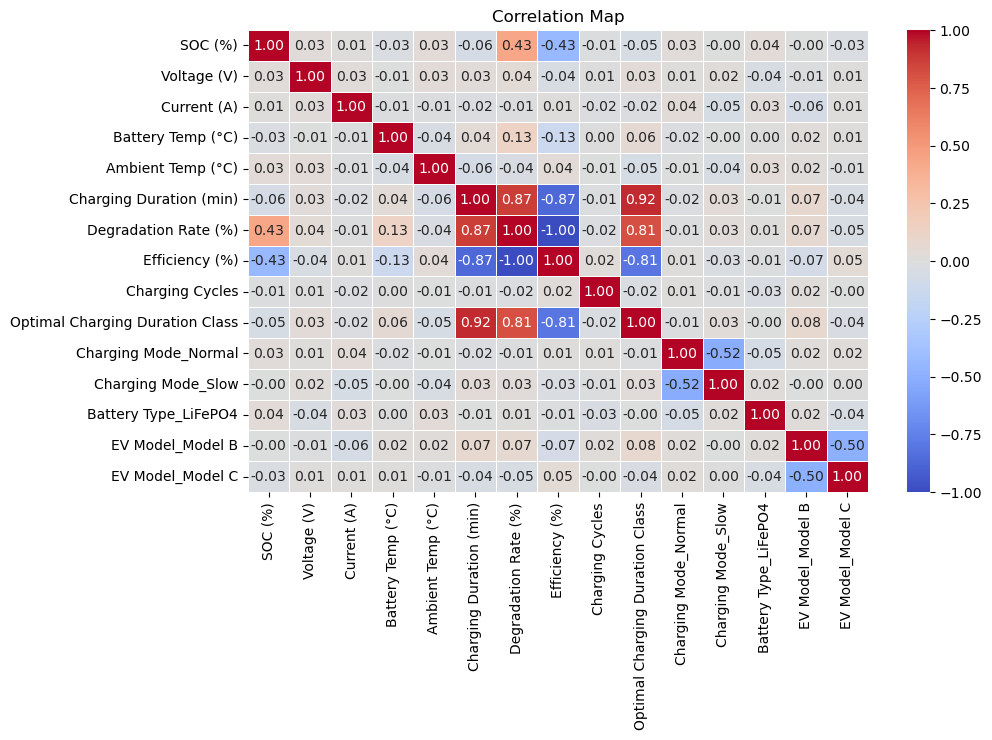

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Map")
plt.show()

In [14]:
# Print correlation top 10
corr_pairs = corr_matrix.unstack()

# Delete correlation column with itself - Values 0 and 1
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

top_10_corr = corr_pairs.abs().sort_values(ascending=False).head(10)

print(top_10_corr)

Degradation Rate (%)             Efficiency (%)                     1.000000
Efficiency (%)                   Degradation Rate (%)               1.000000
Charging Duration (min)          Optimal Charging Duration Class    0.923751
Optimal Charging Duration Class  Charging Duration (min)            0.923751
Degradation Rate (%)             Charging Duration (min)            0.868795
Charging Duration (min)          Degradation Rate (%)               0.868795
Efficiency (%)                   Charging Duration (min)            0.868795
Charging Duration (min)          Efficiency (%)                     0.868795
Degradation Rate (%)             Optimal Charging Duration Class    0.807085
Optimal Charging Duration Class  Degradation Rate (%)               0.807085
dtype: float64


Strongest Correlation: 
- Degradation Rate (%) and Efficiency (%) - 1.00

High Correlation:
- Charging Duration (min) and Optimal Charging Duration Class - 0.92
- Degradation Rate (%), Efficiency (%), and Charging Duration (min) - 0.86

Behind 80% correlation:
- Degradation Rate (%) and Optimal Charging Duration Class - 0.81


## Visualizations

Relation - Degragation and Efficiency

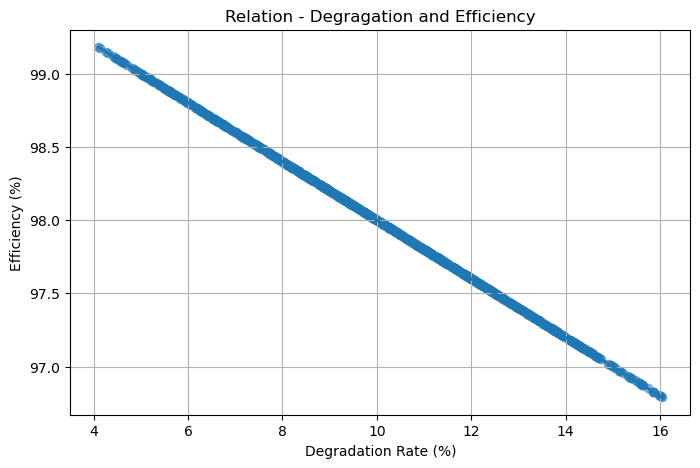

In [15]:
plt.figure(figsize=(8, 5))

sns.regplot(x=df["Degradation Rate (%)"], y=df["Efficiency (%)"], scatter_kws={"alpha":0.5})

plt.title("Relation - Degragation and Efficiency")

plt.xlabel("Degradation Rate (%)")
plt.ylabel("Efficiency (%)")

plt.grid()
plt.show()

Relation - Charging Duration and Optimal Charging Duration Class

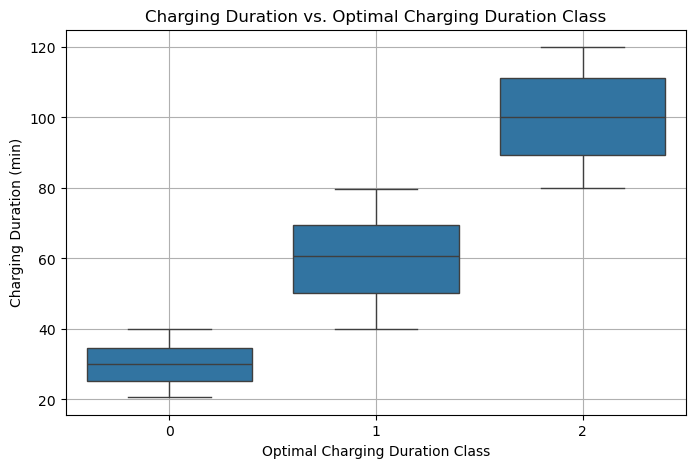

In [16]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=df["Optimal Charging Duration Class"], y=df["Charging Duration (min)"])

plt.title("Charging Duration vs. Optimal Charging Duration Class")

plt.xlabel("Optimal Charging Duration Class")
plt.ylabel("Charging Duration (min)")

plt.grid()
plt.show()

Optimal Charging Duration Class: The target variable representing the classification of the optimal charging duration:
- Short (0): Charging duration is short (≤ 40 minutes).
- Medium (1): Charging duration is moderate (≤ 80 minutes).
- Long (2): Charging duration is long (> 80 minutes).

Pairplot of Degradation Rate (%), Efficiency (%), Charging Duration (min), Optimal Charging Duration Class

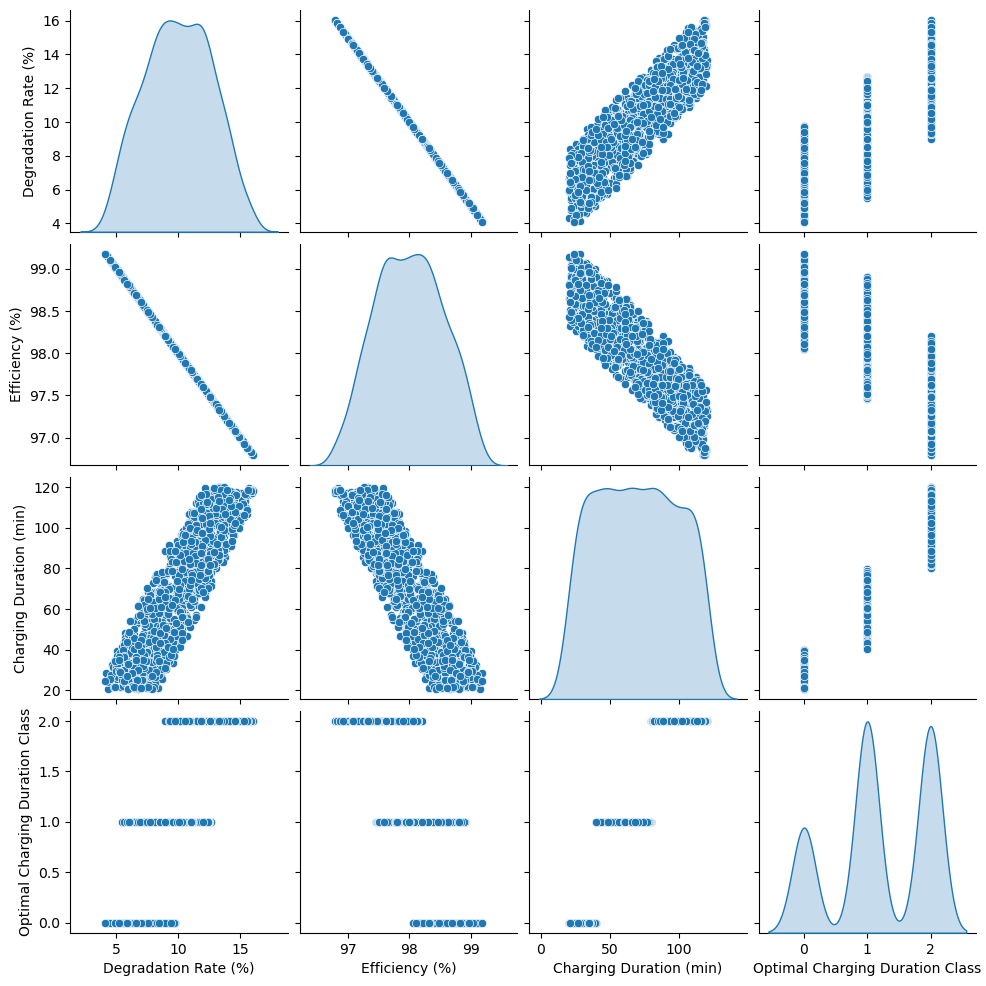

In [17]:
sns.pairplot(df, vars=["Degradation Rate (%)", "Efficiency (%)", "Charging Duration (min)", "Optimal Charging Duration Class"], diag_kind="kde")
plt.show()

We can see here in the last line, that the more the longer charging duration the more degradation rate
Also de efficiency drops

Relation - Charging Cycles and Degradation Rate (%)

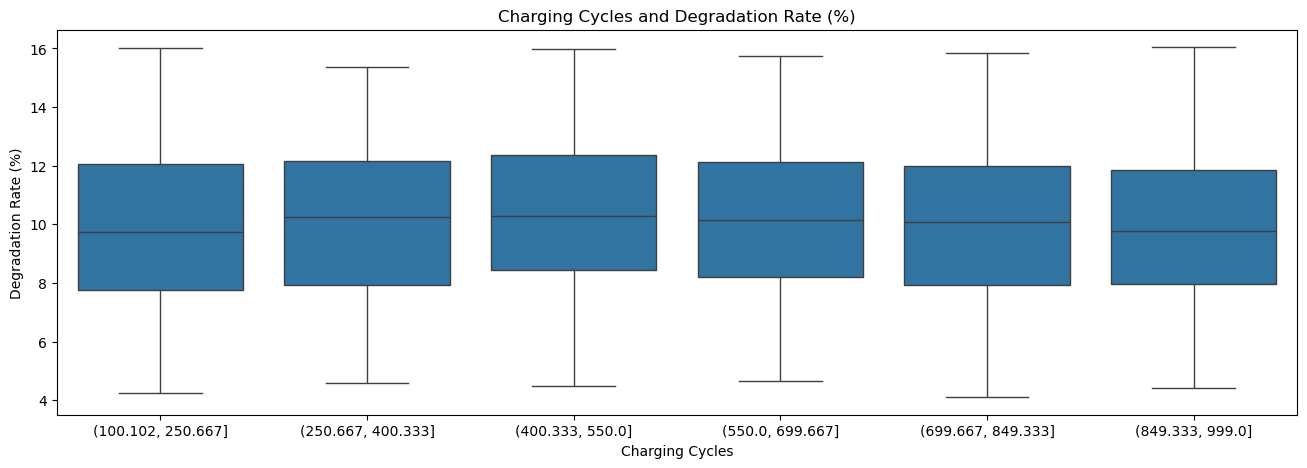

In [18]:
plt.figure(figsize=(16, 5))

#sns.scatterplot(x=df["Charging Cycles"], y=df["Degradation Rate (%)"], alpha=0.5)
sns.boxplot(x=pd.cut(df["Charging Cycles"], bins=6), y=df["Degradation Rate (%)"])

plt.title("Charging Cycles and Degradation Rate (%)")

plt.xlabel("Charging Cycles")
plt.ylabel("Degradation Rate (%)")

plt.show()

Relation - Battery Eficiency vs battery Temperature

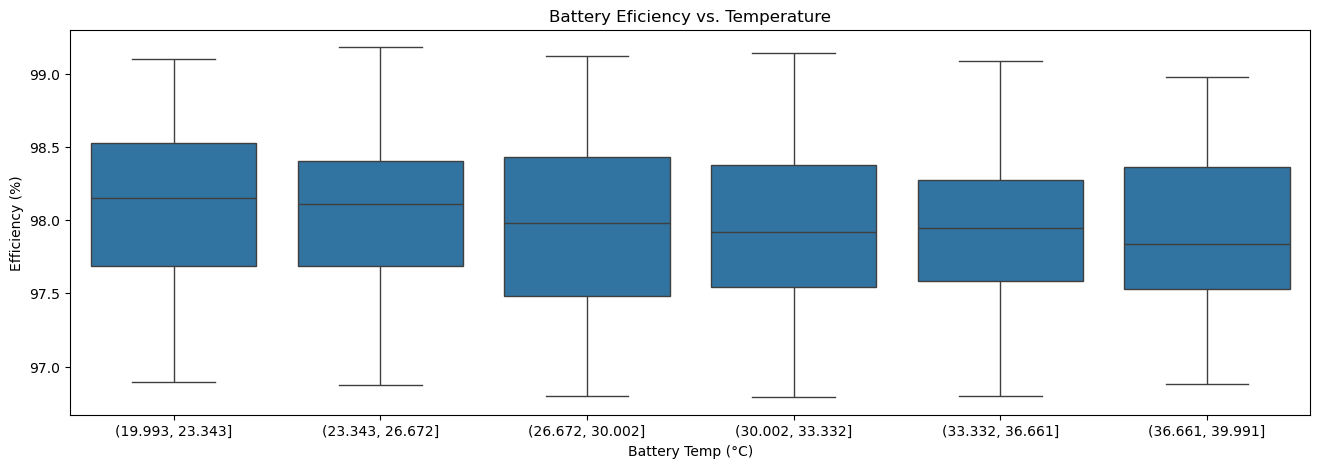

In [19]:
plt.figure(figsize=(16, 5))
#sns.scatterplot(x=df["Battery Temp (°C)"], y=df["Efficiency (%)"], alpha=0.5)
sns.boxplot(x=pd.cut(df["Battery Temp (°C)"], bins=6), y=df["Efficiency (%)"])
plt.title("Battery Eficiency vs. Temperature")
plt.xlabel("Battery Temp (°C)")
plt.ylabel("Efficiency (%)")
plt.show()

## Prepare Data for Analysis
1. Separate the features from the labels into 2 objects, X and y.
2. Split the data into training-testing data
3. Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set)

### will drop Charging Duration because is derived from Optimal Charging duration Class column

In [20]:
# will drop Charging Duration because is derived from Optimal Charging duration Class column
df = df.drop('Charging Duration (min)',axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Degradation Rate (%)             1000 non-null   float64
 6   Efficiency (%)                   1000 non-null   float64
 7   Charging Cycles                  1000 non-null   int64  
 8   Optimal Charging Duration Class  1000 non-null   int64  
 9   Charging Mode_Normal             1000 non-null   float64
 10  Charging Mode_Slow               1000 non-null   float64
 11  Battery Type_LiFePO4             1000 non-null   float64
 12  EV Model_Model B     

In [21]:
# X and y
X = df.drop('Optimal Charging Duration Class',axis=1)
y = df['Optimal Charging Duration Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scale data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model 1 - Logistic Regression Model

1. Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.
2. Report back your search's optimal parameters, specifically the C value.
3. Report model's coefficients.
4. Create a visualization of the coefficients by using a barplot of their values.

In [22]:
# Create model
from sklearn.linear_model import LogisticRegression
# Initializing the Logistic Regression model
log_model = LogisticRegression()

# Fitting the model to the scaled training data
log_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Model parameters
log_model.coef_

array([[ 5.87408420e-02, -1.16248313e-02, -1.15500666e-02,
        -1.33799215e-01,  1.10569624e-01, -1.15562845e+00,
         1.02571713e-01, -7.10974719e-04,  2.85618366e-03,
         6.11389855e-03,  2.43541542e-03, -2.05619632e-02,
         1.18074682e-02],
       [ 2.06511893e-02,  5.87846776e-03,  2.14247553e-03,
        -1.48004362e-02, -2.14930738e-02, -5.22509991e-01,
         6.64026742e-02, -1.71090520e-04, -8.07997806e-03,
        -1.85299201e-02, -9.24773304e-03, -1.52414382e-02,
         6.65526782e-03],
       [-7.93920313e-02,  5.74636355e-03,  9.40759109e-03,
         1.48599651e-01, -8.90765503e-02,  1.67813844e+00,
        -1.68974388e-01,  8.82065240e-04,  5.22379440e-03,
         1.24160215e-02,  6.81231762e-03,  3.58034015e-02,
        -1.84627360e-02]])

In [24]:
# Obtain C value
print("C value:", log_model.C)

C value: 1.0


In [25]:
# Model coefficients
log_model.coef_

array([[ 5.87408420e-02, -1.16248313e-02, -1.15500666e-02,
        -1.33799215e-01,  1.10569624e-01, -1.15562845e+00,
         1.02571713e-01, -7.10974719e-04,  2.85618366e-03,
         6.11389855e-03,  2.43541542e-03, -2.05619632e-02,
         1.18074682e-02],
       [ 2.06511893e-02,  5.87846776e-03,  2.14247553e-03,
        -1.48004362e-02, -2.14930738e-02, -5.22509991e-01,
         6.64026742e-02, -1.71090520e-04, -8.07997806e-03,
        -1.85299201e-02, -9.24773304e-03, -1.52414382e-02,
         6.65526782e-03],
       [-7.93920313e-02,  5.74636355e-03,  9.40759109e-03,
         1.48599651e-01, -8.90765503e-02,  1.67813844e+00,
        -1.68974388e-01,  8.82065240e-04,  5.22379440e-03,
         1.24160215e-02,  6.81231762e-03,  3.58034015e-02,
        -1.84627360e-02]])

C:\Users\szmaj\AppData\Local\Temp\ipykernel_125632\1087741271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficients", y="Features", data=coef_df, palette="coolwarm")


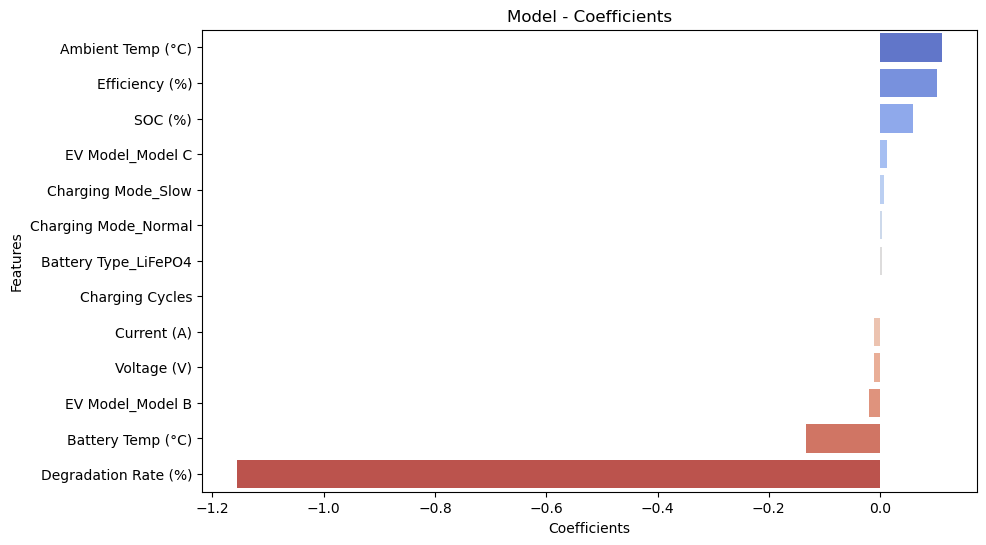

In [26]:
# Barplot of coefficients
coef_values = log_model.coef_[0]  
features    = X_train.columns  

coef_df = pd.DataFrame({"Features": features, "Coefficients": coef_values})
coef_df = coef_df.sort_values(by="Coefficients", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficients", y="Features", data=coef_df, palette="coolwarm")

plt.title("Model - Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

Higher efficiency (%) is associated with a higher optimal charging duration class. 
This suggests that more efficient battery charging processes align with longer optimal charging durations.

A higher degradation rate (%) strongly reduces the chances of achieving an optimal charging duration.

Higher battery temperature (°C) also has a negative impact, making it less likely to reach the ideal charging duration.

Factors such as ambient temperature (°C), battery temperature (°C), and voltage (V) have a slight positive influence. 
This indicates that under certain conditions, these factors contribute marginally to improving the optimal charging duration.

## Model 1 - Model Evaluation

1. Create the following evaluations:
    * Confusion Matrix Array
    * Confusion Matrix Plot
    * Classification Report
2. Create both the precision-recall curve and the ROC Curve.

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12 10  0]
 [ 4 33  2]
 [ 1  2 36]]


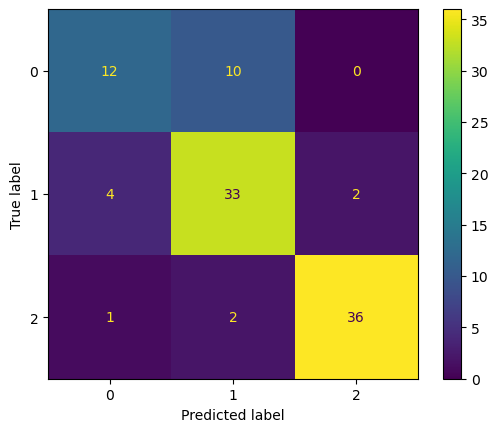

In [28]:
# Confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

True Positives

Short charging:  12 of 17 instances were correctly classified.

Medium charging: 33 of 45 instances were correctly classified.

Long charging:   36 of 38  instances were correctly classified.

19 error where found of 100 values. 


In [29]:
# Classification report
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.55      0.62        22
           1       0.73      0.85      0.79        39
           2       0.95      0.92      0.94        39

    accuracy                           0.81       100
   macro avg       0.80      0.77      0.78       100
weighted avg       0.81      0.81      0.81       100



Precision  - How many of the predicted positive cases were actually positive.

Recall	   - How many of the actual positive cases were correctly identified.

Value 0 (Short (0): Charging duration is short (≤ 40 minutes))
- Precision = 71% it was correct.
- Recall    = 55% of the short charging duration were correctly identified.

Value 1 (Medium (1): Charging duration is moderate (≤ 80 minutes))
- Precision = 73% it was correct.
- Recall    = 85% of the medium charging duration were correctly identified.

Value 2 (Long (2): Charging duration is long (> 80 minutes))
- Precision = 95% it was correct.
- Recall    = 92% of the long charging duration were correctly identified.

Accuracy 81% 

## Model 2 - SVM - Support Vector Machines

In [30]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC()

param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print("BEST Parameters: ", best_params)



BEST Parameters:  {'C': 1, 'kernel': 'linear'}


In [33]:

for params, model in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
    print(f"Parameters: {params} - Accuracy: {model:.4f}")

# Best Model Estimator
best_svm = grid.best_estimator_
best_svm

Parameters: {'C': 0.01, 'kernel': 'linear'} - Accuracy: 0.9637
Parameters: {'C': 0.01, 'kernel': 'rbf'} - Accuracy: 0.3975
Parameters: {'C': 0.1, 'kernel': 'linear'} - Accuracy: 0.9613
Parameters: {'C': 0.1, 'kernel': 'rbf'} - Accuracy: 0.3975
Parameters: {'C': 1, 'kernel': 'linear'} - Accuracy: 0.9800
Parameters: {'C': 1, 'kernel': 'rbf'} - Accuracy: 0.4087


SVC(C=1, kernel='linear')

In [34]:
y_pred = best_svm.predict(X_test)

In [35]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
cm       = confusion_matrix(y_test, y_pred)

print("Model Accuracy: ", accuracy)
print("Confusion Matrix: ")
print(cm)

Model Accuracy:  1.0
Confusion Matrix: 
[[33  0  0]
 [ 0 90  0]
 [ 0  0 77]]


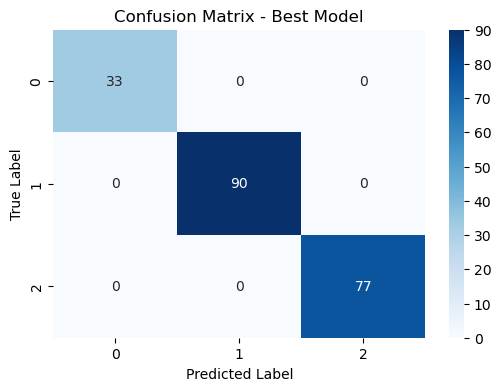

In [36]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

True Positives

Short charging:  33 instances were correctly classified.

Medium charging: 90 instances were correctly classified.

Long charging:   77 instances were correctly classified.


In [37]:
# Classification report
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Precision  - How many of the predicted positive cases were actually positive.

Recall	   - How many of the actual positive cases were correctly identified.

Value 0 (Short (0): Charging duration is short (≤ 40 minutes))
- Precision = 100% it was correct.
- Recall    = 100% of the short charging duration were correctly identified.

Value 1 (Medium (1): Charging duration is moderate (≤ 80 minutes))
- Precision = 100% it was correct.
- Recall    = 100% of the medium charging duration we correctly identified.

Value 2 (Long (2): Charging duration is long (> 80 minutes))
- Precision = 100% it was correct.
- Recall    = 100% of the long charging duration were correctly identified.

Accuracy 100% 

## Testing Final Model with Simulated Inputs

Using some simulated data lets see how the model reacts.

Will be using 2nd model found with SVM gridsearch

In [38]:
X_test[:1]

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Degradation Rate (%),Efficiency (%),Charging Cycles,Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
521,44.280177,4.154105,22.099162,29.382144,26.542342,10.161061,97.967788,495,0.0,1.0,1.0,1.0,0.0


In [39]:
y_test[:1]

521    1
Name: Optimal Charging Duration Class, dtype: int64

This case it is an optimal charging duration class - value 1 - Medium

In [40]:
y_pred = best_svm.predict(X_test[:1])

print("Prediction: ", y_pred)

Prediction:  [1]


The model works perfectly... next time would be better to find some extra numbers from other battery companies.